In [1]:
#Блок в рамках которого импотряться математические подсчеты, падас и нампай
import pandas as pd
import numpy as np
from scipy.stats import iqr
from scipy import stats
from scipy.stats import skew
from scipy.stats import kurtosis
import scipy.stats
import scipy as sp
import scipy.stats as stats


import os
#Блок в рамках которого импотряться графики
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns 
from matplotlib.pyplot import figure
sns.set_style('darkgrid')


#Блок в рамках которого импотряться статистические пакеты
import statsmodels.api as sm 
import statsmodels.formula.api as smf 
from sklearn.preprocessing import OneHotEncoder
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
from statsmodels.regression.linear_model import OLS
from sklearn.decomposition import PCA
from statsmodels.stats.diagnostic import het_white, het_goldfeldquandt, het_breuschpagan
from statsmodels.stats.outliers_influence import reset_ramsey
from statsmodels.stats.diagnostic import compare_encompassing 

# Блок, в рамках которого импортируются пакеты для визуализации
from stargazer.stargazer import Stargazer

In [2]:
# making "directoryback"
os.chdir(os.path.normpath(os.getcwd() + os.sep + os.pardir))

# Квантильная регрессия

In [11]:
data = pd.read_csv('PhonesDF_years_corrected_v3.csv')
X_columns = list(data.drop(columns=['log_price', 'phone_title', 'specs_score']).columns)
data['density'] = data['density']/10000
data['battery_capacity'] = data['battery_capacity']/1000
mod = smf.quantreg('log_price ~ ' + (' + '.join(X_columns)), data)

In [4]:
X_columns

['rating',
 'disp_diag',
 'camera',
 'storage',
 'ram',
 'battery_capacity',
 'year_of_release',
 'density',
 'Other_oper_syst',
 'battery_type_LiPo',
 'brand_Apple',
 'brand_BlackBerry',
 'brand_Cubot',
 'brand_Gionee',
 'brand_Google',
 'brand_HTC',
 'brand_Honor',
 'brand_Huawei',
 'brand_Infinix',
 'brand_LG',
 'brand_Lava',
 'brand_Lenovo',
 'brand_Motorola',
 'brand_Nokia',
 'brand_OnePlus',
 'brand_Oppo',
 'brand_Realme',
 'brand_Samsung',
 'brand_Sony',
 'brand_Tecno',
 'brand_Vivo']

Заметим, что из EDA мы знаем, что распределение логарифма цены смартфонов имеет правостороннюю асимметрию, поэтому имеет смысл применить квантильную регрессию для оценки условной медианы соответсвующей цены.

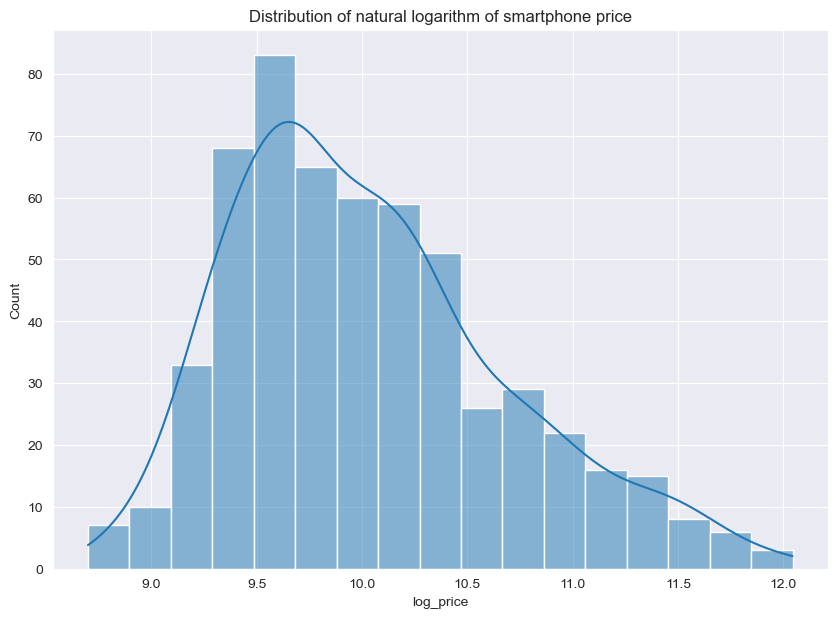

In [5]:
fig, ax = plt.subplots(figsize=(10, 7))
sns.histplot(data=data, x='log_price', ax=ax,  kde=True)
ax.set_title('Distribution of natural logarithm of smartphone price');

 Оценим квантильную регрессию для квантилей логарифма цены смартофна уровней 0.1, 0.5, 0.9.

In [12]:
mod = smf.quantreg('log_price ~ ' + (' + '.join(X_columns)), data)
res = mod.fit(q=0.1, max_iter=10000)
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                         QuantReg Regression Results                          
==============================================================================
Dep. Variable:              log_price   Pseudo R-squared:               0.3301
Model:                       QuantReg   Bandwidth:                      0.2241
Method:                 Least Squares   Sparsity:                        1.305
Date:                Wed, 10 May 2023   No. Observations:                  561
Time:                        18:33:41   Df Residuals:                      529
                                        Df Model:                           31
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             0.0068     47.784      0.000      1.000     -93.863      93.877
rating                0.0233      0.028      0.831      0.406      -0.032       0.078
disp_diag             0.2332      0.067      3.497      0.001       0.102       0.364
camera                0.0087      0.003      2.650      0.008       0.002       0.015
storage               0.0013      0.000      3.679      0.000       0.001       0.002
ram                   0.0245      0.015      1.596      0.111      -0.006       0.055
battery_capacity     -0.0300      0.036     -0.832      0.406      -0.101       0.041
year_of_release       0.0037      0.024      0.156      0.876      -0.043       0.050
density               0.0068      0.008      0.839      0.402      -0.009       0.023
Other_oper_syst       0.3398      0.609      0.558      0.577      -0.856       1.536
battery_type_LiPo    -0.0398      0.050     -0.794      0.428      -0.138       0.059
brand_Apple           1.2902      0.123     10.512      0.000       1.049       1.531
brand_BlackBerry      0.2704      0.158      1.706      0.089      -0.041       0.582
brand_Cubot           0.6606      0.301      2.195      0.029       0.069       1.252
brand_Gionee          0.4693      0.595      0.789      0.430      -0.699       1.638
brand_Google          0.4448      0.131      3.387      0.001       0.187       0.703
brand_HTC             0.2252      0.104      2.156      0.032       0.020       0.430
brand_Honor           1.0480      0.247      4.238      0.000       0.562       1.534
brand_Huawei          0.1234      0.071      1.748      0.081      -0.015       0.262
brand_Infinix         0.1515      0.092      1.640      0.102      -0.030       0.333
brand_LG              0.3762      0.148      2.544      0.011       0.086       0.667
brand_Lava           -0.0463      0.595     -0.078      0.938      -1.215       1.123
brand_Lenovo          0.1789      0.115      1.559      0.120      -0.047       0.404
brand_Motorola        0.7238      0.211      3.426      0.001       0.309       1.139
brand_Nokia           0.1720      0.106      1.622      0.105      -0.036       0.380
brand_OnePlus         1.1780      0.124      9.502      0.000       0.934       1.422
brand_Oppo            0.0015      0.094      0.016      0.987      -0.184       0.187
brand_Realme          0.1811      0.113      1.609      0.108      -0.040       0.402
brand_Samsung         0.3432      0.060      5.690      0.000       0.225       0.462
brand_Sony            0.5793      0.157      3.697      0.000       0.271       0.887
brand_Tecno           0.1470      0.082      1.785      0.075      -0.015       0.309
brand_Vivo            0.5733      0.248      2.312      0.021       0.086       1.061
=====================================================================================

The condition number is large, 4.46e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Видно, что в отличие от OLS с робастными ошибками в форме Уайта, в данном случае коэффициент при рейтинге, оперативной памяти, плотности экрана, а также при большинстве брендов - незначимы на любом разумном уровне значимости. В то время как коэффициент при емкости батареи и диагонале дисплея стали значимыми на любом разумном уровне значимости. Это можно объяснить тем, что квантиль уровня 0.1 в каком-то смысле является чем-то в духе нижней оценки цены телефона, имеющего заданные характеристики, поэтому со стороны спроса ее определяют в основном наиболее понятные и имеющие первоочередную важность для потребителя характеристики, а со стороны предложения - цены основных комплектующих.

В таком случае рейтинг смартфона в интернет-магазине не будет играть большой роли, поэтому он и оказывается незначимым, а год выпуска является инсрументом, отражающим качество комплектующих используемых в производстве, поэтому он оказывается значимым. Также логично ожидать, что нижняя оценка цены смартфона не привязана к бренду, так как потребители в большинстве смотрят на него не в первую очередь.

Теперь оценим моду условного распределения логарифма цены смартофна

In [15]:
mod = smf.quantreg('log_price ~ ' + (' + '.join(X_columns)), data)
res2 = mod.fit(q=0.5, max_iter=10**5)
res2.summary()

C:\Users\79186\anaconda3\lib\site-packages\statsmodels\regression\quantile_regression.py:191: IterationLimitWarning: Maximum number of iterations (100000) reached.
  warnings.warn("Maximum number of iterations (" + str(max_iter) +


<class 'statsmodels.iolib.summary.Summary'>
"""
                         QuantReg Regression Results                          
==============================================================================
Dep. Variable:              log_price   Pseudo R-squared:               0.3858
Model:                       QuantReg   Bandwidth:                      0.1963
Method:                 Least Squares   Sparsity:                       0.7366
Date:                Wed, 10 May 2023   No. Observations:                  561
Time:                        18:41:09   Df Residuals:                      529
                                        Df Model:                           31
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             0.0002     34.342   4.74e-06      1.000     -67.462      67.463
rating                0.0495      0.023      2.110      0.035       0.003       0.096
disp_diag             0.0346      0.057      0.610      0.542      -0.077       0.146
camera                0.0048      0.002      2.027      0.043       0.000       0.009
storage               0.0027      0.000      8.573      0.000       0.002       0.003
ram                   0.0568      0.009      5.978      0.000       0.038       0.075
battery_capacity     -0.0191      0.033     -0.579      0.563      -0.084       0.046
year_of_release       0.0044      0.017      0.257      0.797      -0.029       0.038
density               0.0249      0.007      3.535      0.000       0.011       0.039
Other_oper_syst      -0.0349      0.290     -0.120      0.904      -0.605       0.535
battery_type_LiPo     0.0540      0.043      1.253      0.211      -0.031       0.139
brand_Apple           0.8914      0.098      9.117      0.000       0.699       1.083
brand_BlackBerry      0.0835      0.134      0.624      0.533      -0.179       0.346
brand_Cubot           0.2522      0.193      1.307      0.192      -0.127       0.631
brand_Gionee         -0.2692      0.266     -1.011      0.312      -0.792       0.254
brand_Google          0.3341      0.124      2.695      0.007       0.091       0.578
brand_HTC            -0.0123      0.082     -0.149      0.882      -0.174       0.150
brand_Honor           0.8844      0.172      5.155      0.000       0.547       1.221
brand_Huawei         -0.0444      0.063     -0.708      0.480      -0.168       0.079
brand_Infinix        -0.1706      0.077     -2.223      0.027      -0.321      -0.020
brand_LG              0.4911      0.116      4.230      0.000       0.263       0.719
brand_Lava           -0.5006      0.272     -1.838      0.067      -1.035       0.034
brand_Lenovo         -0.0608      0.122     -0.498      0.618      -0.301       0.179
brand_Motorola        0.4931      0.161      3.070      0.002       0.178       0.809
brand_Nokia          -0.0610      0.095     -0.640      0.522      -0.248       0.126
brand_OnePlus         0.5682      0.106      5.356      0.000       0.360       0.777
brand_Oppo           -0.0005      0.080     -0.006      0.995      -0.157       0.156
brand_Realme         -0.1484      0.098     -1.510      0.132      -0.342       0.045
brand_Samsung         0.1322      0.056      2.371      0.018       0.023       0.242
brand_Sony            0.3467      0.124      2.795      0.005       0.103       0.590
brand_Tecno          -0.0613      0.074     -0.825      0.410      -0.207       0.085
brand_Vivo            0.0756      0.172      0.439      0.660      -0.262       0.414
=====================================================================================

The condition number is large, 4.46e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Заметим, что теперь коэффициент при рейтинге смартофна стал значимым на 5% уровне значимости, а при переменной, отвечающей за год выпуска сматофна, по-прежнему остался значимым на любом разумном уровне значимости. При брендах Apple, OnePlus, LG, Infinix коэффициенты - значимы на любом разумном уровне значимости. Также заметим, что перед количеством мегапикселей камеры коэффициент получился незначимым на любом разумном уровне значимости.

In [16]:
mod = smf.quantreg('log_price ~ ' + (' + '.join(X_columns)), data)
res3 = mod.fit(q=0.9, max_iter=10**5)
res3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                         QuantReg Regression Results                          
==============================================================================
Dep. Variable:              log_price   Pseudo R-squared:               0.4512
Model:                       QuantReg   Bandwidth:                      0.2332
Method:                 Least Squares   Sparsity:                        1.931
Date:                Wed, 10 May 2023   No. Observations:                  561
Time:                        18:41:15   Df Residuals:                      529
                                        Df Model:                           31
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -0.0077     61.660     -0.000      1.000    -121.136     121.121
rating                0.0922      0.046      1.991      0.047       0.001       0.183
disp_diag            -0.0125      0.115     -0.109      0.913      -0.239       0.214
camera                0.0096      0.004      2.341      0.020       0.002       0.018
storage               0.0026      0.001      4.645      0.000       0.002       0.004
ram                   0.0606      0.014      4.286      0.000       0.033       0.088
battery_capacity     -0.0530      0.061     -0.868      0.386      -0.173       0.067
year_of_release       0.0048      0.031      0.157      0.876      -0.055       0.065
density               0.0441      0.011      3.945      0.000       0.022       0.066
Other_oper_syst      -0.0551      0.896     -0.061      0.951      -1.815       1.704
battery_type_LiPo    -0.0604      0.081     -0.746      0.456      -0.219       0.099
brand_Apple           0.7900      0.193      4.103      0.000       0.412       1.168
brand_BlackBerry      0.1303      0.203      0.640      0.522      -0.269       0.530
brand_Cubot          -0.1522      0.457     -0.333      0.739      -1.050       0.746
brand_Gionee         -0.6317      0.880     -0.718      0.473      -2.359       1.096
brand_Google          0.7625      0.244      3.128      0.002       0.284       1.241
brand_HTC            -0.1463      0.153     -0.959      0.338      -0.446       0.154
brand_Honor           0.6079      0.363      1.675      0.095      -0.105       1.321
brand_Huawei         -0.0340      0.110     -0.309      0.757      -0.250       0.182
brand_Infinix        -0.4448      0.123     -3.610      0.000      -0.687      -0.203
brand_LG              0.4794      0.205      2.334      0.020       0.076       0.883
brand_Lava           -1.2002      0.890     -1.349      0.178      -2.948       0.548
brand_Lenovo         -0.4477      0.233     -1.924      0.055      -0.905       0.009
brand_Motorola        0.7265      0.307      2.368      0.018       0.124       1.329
brand_Nokia          -0.4052      0.163     -2.489      0.013      -0.725      -0.085
brand_OnePlus         0.2512      0.193      1.303      0.193      -0.128       0.630
brand_Oppo           -0.2219      0.129     -1.724      0.085      -0.475       0.031
brand_Realme          0.1478      0.159      0.930      0.353      -0.164       0.460
brand_Samsung         0.0556      0.093      0.597      0.551      -0.127       0.239
brand_Sony            0.1571      0.251      0.625      0.532      -0.337       0.651
brand_Tecno           0.2332      0.120      1.939      0.053      -0.003       0.470
brand_Vivo           -0.3341      0.365     -0.915      0.361      -1.051       0.383
=====================================================================================

The condition number is large, 4.46e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Выведем таблицу с оценками регрессий

In [9]:
stargazer = Stargazer([res, res2, res3])
Func = open("q_ols.html","w")

Func.write(stargazer.render_html())

Func.close()

Так как мы оцениваем квантиль уровня 0.9, то можно думать, что мы оцениваем, что определеяет верхнюю оценку цены смартфона с заданными характеристиками.

Ситуация с коэффициентами при рейтинге и годом выпуска смартфона повторяется - они оба значимы на 5% уровне значимости. Большинство брендов, наоборот, оказывают статистически незначимый эффект на цену смартфона, однако есть и контрпримеры: Apple, Google, Infinix, Nokia, Oppo.

Теперь посмотрим, как меняются оценки коэффициентов перед rating, disp_diag, brand_Samsung и brand_Apple при имзенении квантилей.

In [70]:
features = ['rating', 'year_of_release', 'brand_OnePlus', 'brand_Apple']
quantiles = np.linspace(0.05, 0.96, 20)


def fit_model(q):
    res = mod.fit(q=q, max_iter=10**5)
    ans = [q]
    for item in features:
        ans.extend([res.params[item]] + res.conf_int().loc[item].tolist())
    return ans

models = [fit_model(x) for x in quantiles]
cols = ['q']
for i, item in enumerate(features):
    cols.extend([f'x_{i}', f'lx_{i}', f'ux_{i}'])
models = pd.DataFrame(models, columns=cols)

print(models)


c:\Users\Anton\anaconda3\lib\site-packages\statsmodels\regression\quantile_regression.py:190: IterationLimitWarning: Maximum number of iterations (100000) reached.
  warnings.warn("Maximum number of iterations (" + str(max_iter) +
c:\Users\Anton\anaconda3\lib\site-packages\statsmodels\regression\quantile_regression.py:190: IterationLimitWarning: Maximum number of iterations (100000) reached.
  warnings.warn("Maximum number of iterations (" + str(max_iter) +
c:\Users\Anton\anaconda3\lib\site-packages\statsmodels\regression\quantile_regression.py:190: IterationLimitWarning: Maximum number of iterations (100000) reached.
  warnings.warn("Maximum number of iterations (" + str(max_iter) +
c:\Users\Anton\anaconda3\lib\site-packages\statsmodels\regression\quantile_regression.py:190: IterationLimitWarning: Maximum number of iterations (100000) reached.
  warnings.warn("Maximum number of iterations (" + str(max_iter) +


           q       x_0      lx_0      ux_0       x_1      lx_1      ux_1  \
0   0.050000  0.011714 -0.066477  0.089905  0.004082  0.003621  0.004542   
1   0.097895 -0.021934 -0.086712  0.042845  0.004055  0.003708  0.004403   
2   0.145789 -0.016260 -0.094501  0.061981  0.004332  0.003927  0.004737   
3   0.193684  0.001451 -0.056808  0.059711  0.004230  0.003915  0.004545   
4   0.241579  0.017827 -0.032616  0.068269  0.004242  0.003968  0.004517   
5   0.289474  0.023522 -0.029516  0.076560  0.004133  0.003845  0.004420   
6   0.337368  0.033655 -0.015625  0.082936  0.004106  0.003834  0.004379   
7   0.385263  0.035224 -0.011658  0.082106  0.004357  0.004097  0.004617   
8   0.433158  0.052651  0.008263  0.097038  0.004299  0.004051  0.004547   
9   0.481053  0.039373 -0.006715  0.085461  0.004376  0.004117  0.004636   
10  0.528947  0.055025  0.007113  0.102937  0.004484  0.004211  0.004756   
11  0.576842  0.049605  0.002966  0.096244  0.004530  0.004263  0.004797   
12  0.624737

c:\Users\Anton\anaconda3\lib\site-packages\statsmodels\regression\quantile_regression.py:190: IterationLimitWarning: Maximum number of iterations (100000) reached.
  warnings.warn("Maximum number of iterations (" + str(max_iter) +


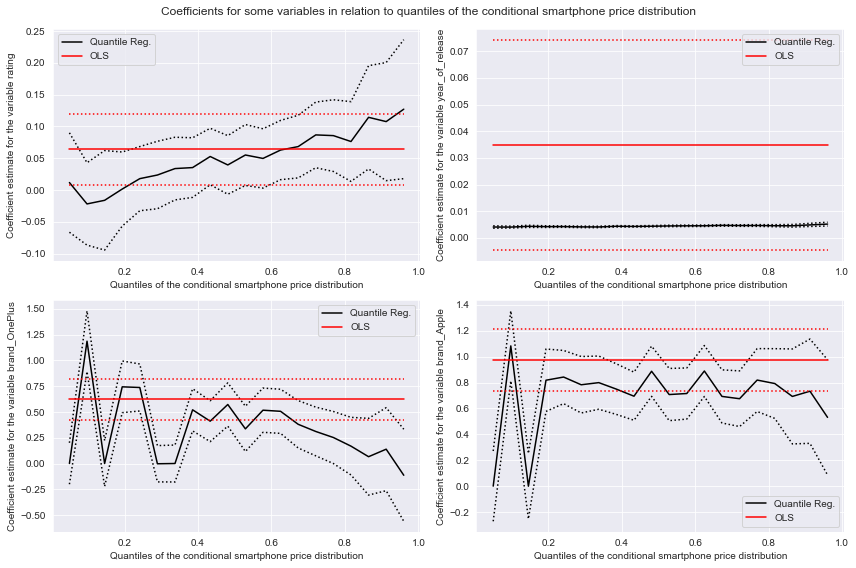

In [158]:
cols = list(data.drop(columns='log_price').columns)
idx_features = [cols.index(feature) for feature in features]

ols = smf.ols('log_price ~ ' + (' + '.join(X_columns)), data).fit().get_robustcov_results()
i = 0
fig, ax = plt.subplots(figsize=(12, 8), nrows=2, ncols=2)
for idx, item in zip(idx_features, features):
    ols_ci = ols.conf_int()[idx + 1 , :].tolist()
    ols_dict = dict(
    x=ols.params[idx + 1], lx=ols_ci[0], ux=ols_ci[1]
    )
    print()
    ax_cur = ax[i // 2][i % 2]
    n = models.shape[0]
    p1 = ax_cur.plot(models.q, models[f'x_{i}'], color="black", label="Quantile Reg.")
    p2 = ax_cur.plot(models.q, models[f'ux_{i}'], linestyle="dotted", color="black")
    p3 = ax_cur.plot(models.q, models[f'lx_{i}'], linestyle="dotted", color="black")
    p4 = ax_cur.plot(models.q, [ols_dict["x"]] * n, color="red", label="OLS")
    p5 = ax_cur.plot(models.q, [ols_dict["lx"]] * n, linestyle="dotted", color="red")
    p6 = ax_cur.plot(models.q, [ols_dict["ux"]] * n, linestyle="dotted", color="red")
    ax_cur.set_ylabel(f'Coefficient estimate for the variable {item}')
    ax_cur.set_xlabel("Quantiles of the conditional smartphone price distribution")
    ax_cur.legend()
    i += 1
fig.suptitle('Coefficients for some variables in relation to quantiles of the conditional smartphone price distribution')
plt.tight_layout();

Видно, что в с ростом уровня оцениваемого квантиля растет и коэффициент при рейтинге смартфона, то есть рейтинг в большей степени определяет верхнюю границу цены, которая может быть на него установлена, нежели ограничивает цену снизу. Оценка коэффициента при годе выпуска практически не меняется с изменением уровня квантиля, причем OLS-оценка данного коэффициента существенно превышает QR-оценку.

Оценка коэффициента при бренде OnePlus почти для всех квантилей ниже, чем соответсвующая МНК-оценка, то же верно и для бренда Apple. Это можно объяснить тем, что квантильная регрессия менее чувствительна к выбросам, а в датасете как раз были телефоны брендов Apple и OnePlus с очень высокой ценой.

# Прогноз

In [39]:
X_columns

['rating',
 'disp_diag',
 'camera',
 'storage',
 'ram',
 'battery_capacity',
 'year_of_release',
 'density',
 'Other_oper_syst',
 'battery_type_LiPo',
 'brand_Apple',
 'brand_BlackBerry',
 'brand_Cubot',
 'brand_Gionee',
 'brand_Google',
 'brand_HTC',
 'brand_Honor',
 'brand_Huawei',
 'brand_Infinix',
 'brand_LG',
 'brand_Lava',
 'brand_Lenovo',
 'brand_Motorola',
 'brand_Nokia',
 'brand_OnePlus',
 'brand_Oppo',
 'brand_Realme',
 'brand_Samsung',
 'brand_Sony',
 'brand_Tecno',
 'brand_Vivo']

In [22]:
ols = smf.ols('log_price ~ ' + (' + '.join(X_columns)), data).fit().get_robustcov_results()

Возьмем характеристики [Xiaomi Poco X3 6GB/64GB](http://web.archive.org/web/20211201100938mp_/https://www.priceinkenya.com/product/xiaomi-poco-x3-6gb64gb), [OnePlus 9R 12GB/256GB](http://web.archive.org/web/20210420125400mp_/https://www.priceinkenya.com/product/oneplus-9r-12gb256gb), [Apple iPhone SE (2020) 256GB](http://web.archive.org/web/20211024223817mp_/https://www.priceinkenya.com/product/apple-iphone-se-2020-256gb)

In [62]:
# specs_score = 62%
char = np.array([
    [5, 6.67, 20, 64, 6, 6000, 2020, 1080*2400 / (6.67)**2, 0, 0] + [0] * 21,
    [3, 6.55, 16, 256, 12, 4500, 2021, 1080*2400 / (6.55)**2, 0, 0] + [0] * 21,
    [4.5, 4.7, 12, 256, 3, 1821, 2020, 750*1334 / (4.7)**2, 0, 0] + [0] * 21,
    ])
char[1, 24] = 1
char[2, 10] = 1
logprice_true = np.log([25499, 68999, 72000])
df_new = pd.DataFrame(char)
df_new.columns = X_columns.copy()
df_new

,rating,disp_diag,camera,storage,ram,battery_capacity,year_of_release,density,Other_oper_syst,battery_type_LiPo,...,brand_Lenovo,brand_Motorola,brand_Nokia,brand_OnePlus,brand_Oppo,brand_Realme,brand_Samsung,brand_Sony,brand_Tecno,brand_Vivo
0,5.0,6.67,20.0,64.0,6.0,6000.0,2020.0,58261.723711,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,3.0,6.55,16.0,256.0,12.0,4500.0,2021.0,60416.059670,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,4.5,4.70,12.0,256.0,3.0,1821.0,2020.0,45291.987325,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### Прогноз OLS

In [67]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
for item, jtem in zip(logprice_true, ols.predict(df_new)):
    print('Predicted expectation of log_price =', jtem)
    print('Real price =', item)
    print()
print('MSE =', mean_squared_error(logprice_true, np.array(ols.predict(df_new)), squared=True))
print('MAE =', mean_absolute_error(logprice_true, np.array(ols.predict(df_new))))

Predicted expectation of log_price = 10.024522916414604
Real price = 10.146394514691288

Predicted expectation of log_price = 11.342617192841743
Real price = 11.141847290720753

Predicted expectation of log_price = 11.293928414704453
Real price = 11.184421397998193

MSE = 0.02238434225736356
MAE = 0.1440495057013115


#### Прогноз QR

In [64]:
mod = smf.quantreg('log_price ~ ' + (' + '.join(X_columns)), data).fit(q=0.1, max_iter=10**5)
for item, jtem in zip(logprice_true, mod.predict(df_new)):
    print('Predicted quantile level 0.1 of log_price =', jtem)
    print('True log_price =', item)
    print()

Predicted quantile level 0.1 of log_price = 9.324803243664006
True log_price = 10.146394514691288

Predicted quantile level 0.1 of log_price = 9.930097424904996
True log_price = 11.141847290720753

Predicted quantile level 0.1 of log_price = 9.752839285672618
True log_price = 11.184421397998193



In [68]:
mod = smf.quantreg('log_price ~ ' + (' + '.join(X_columns)), data).fit(q=0.5, max_iter=10**5)
for item, jtem in zip(logprice_true, mod.predict(df_new)):
    print('Predicted median log_price =', jtem)
    print('True log_price =', item)
    print()
print('MSE =', mean_squared_error(logprice_true, np.array(mod.predict(df_new)), squared=True))
print('MAE =', mean_absolute_error(logprice_true, np.array(mod.predict(df_new))))

Predicted median log_price = 10.122816656127124
True log_price = 10.146394514691288

Predicted median log_price = 11.277744013391438
True log_price = 11.141847290720753

Predicted median log_price = 11.155340077698385
True log_price = 11.184421397998193

MSE = 0.006623185945828242
MAE = 0.06285196717821862


In [66]:
mod = smf.quantreg('log_price ~ ' + (' + '.join(X_columns)), data).fit(q=0.9, max_iter=10**5)
for item, jtem in zip(logprice_true, mod.predict(df_new)):
    print('Predicted quantile level 0.9 of log_price =', jtem)
    print('True log_price =', item)
    print()

Predicted quantile level 0.9 of log_price = 10.783334245997258
True log_price = 10.146394514691288

Predicted quantile level 0.9 of log_price = 11.576300343403052
True log_price = 11.141847290720753

Predicted quantile level 0.9 of log_price = 11.997931885750564
True log_price = 11.184421397998193



c:\Users\Anton\anaconda3\lib\site-packages\statsmodels\regression\quantile_regression.py:190: IterationLimitWarning: Maximum number of iterations (100000) reached.
  warnings.warn("Maximum number of iterations (" + str(max_iter) +
